# **Species Classification — Iris Flower Dataset**

Mark Hodierne  
ML Project Portfolio  
7th March 2024  
https://github.com/markhodierne/iris-recognition  
https://www.linkedin.com/in/markhodierne  


---

#### ***Status: PROJECT COMPLETE***

1. Neural Network built.
1. Optimization - experimented with size of hidden layer, learning rates, number of epochs and batch size.
3. Performance of model optimizations analyzed and opportunities for further improvements identified.
4. Conclusions complete, including summary of learning.



---

## **1. About this project**

The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis." (1)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The goal of this project is to build a simple neural network that will classify samples correctly based on these four features.

**References:**

1. R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179-188



---

## **2. Implementation approach: building a neural network from first principles**

This notebook demonstrates, step by step, how a simple neural network can be built and trained **from first principles** (without using deep learning libraries) to classify species of Iris flower based on the four features.

**Objectives:**  
- Build every part of the network by hand: weight initialization, activation functions, forward and backward passes, and gradient descent.
- Show and explain all the maths underpinning the process.
- Visualize and interpret results at each step.
- Explore how changing model parameters affects performance.

> All equations are shown explicitly, so you can truly see "under the hood" of a neural network.

#### **Network architecture**  

The simple neural network implemented is a perceptron model with one hidden layer:

![](https://drive.google.com/uc?export=view&id=1mbRPZHaJTkO9djR6l1NY7WBWSUOWPbQL)

- Input Layer: 4 units, one for each feature of the Iris dataset (sepal length, sepal width, petal length, petal width).
- Hidden Layer: Starts with 6 units (this is a tunable hyperparameter; later experimentation will find the optimal number for this problem).
- Output Layer: 3 units, each representing one of the Iris species.

**Activation functions:**

- **ReLU** (Rectified Linear Unit) for the hidden layer:  
  $\mathrm{ReLU}(x) = \max(0, x)$

- **Softmax** for the output layer:  
  $\mathrm{softmax}(z_j) = \dfrac{e^{z_j}}{\sum_{l=1}^{k} e^{z_l}}$,  
  where $k$ is the number of classes.

#### **Data flow and matrix shapes**

![](https://drive.google.com/uc?export=view&id=1jrJJNIYagcRqipLiY8ehy6fpDE7re0gw)

If $n$ is the number of samples and $h$ is the size of the hidden layer:

- Input matrix: $\mathbf{a}_0 \in \mathbb{R}^{n \times 4}$
- First layer weights: $\mathbf{w}_1 \in \mathbb{R}^{4 \times h}$
- First layer biases: $\mathbf{b}_1 \in \mathbb{R}^{1 \times h}$
- Hidden activations: $\mathbf{a}_1 \in \mathbb{R}^{n \times h}$
- Second layer weights: $\mathbf{w}_2 \in \mathbb{R}^{h \times 3}$
- Second layer biases: $\mathbf{b}_2 \in \mathbb{R}^{1 \times 3}$
- Output probabilities: $\mathbf{a}_2 \in \mathbb{R}^{n \times 3}$

#### **Dataset characteristics and evaluation strategy**

- The Iris Dataset is extremely small - containing only 150 samples:
  - 80% of the data is used for training (no validation dataset used)
  - 20% of the data is reserved as a test set.

#### **Deployment plan**

- Once the model is trained and optimized, it can be **packaged in a Docker image** alongside a **FastAPI application** to serve predictions.
- The container can be deployed to a production environment (e.g., bare metal server), using a process manager (like `systemd`) or container orchestration for reliability.
- Observability (logging and metrics) will be integrated for monitoring model usage and health.

Full code is included in the GitHub repository - https://github.com/markhodierne/iris-recognition.

---
## **3. Imports and random seed**

Only the following core scientific Python libraries are used:
- **NumPy** for array and matrix operations
- **Pandas** for data handling
- **Matplotlib** for plotting and visualization
- **Scikit-learn** (only for data loading, train-test splitting, and EDA)

A fixed random seed ensures all results are reproducible.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Set global random seed for reproducibility
np.random.seed(42)


---
## **4. Loading and preprocessing the Iris dataset**

The **Iris dataset** consists of 150 flower samples from three different species (*Setosa*, *Versicolor*, *Virginica*).  
Each sample has four features:
- sepal length
- sepal width
- petal length
- petal width

We will:
1. Load the data
2. Prepare the feature matrix $\mathbf{X}$ and one-hot encoded labels $\mathbf{Y}$
3. Split the data into training and test sets

**Mathematical notation:**
Let $n$ be the number of samples, $d$ the number of features (here $d=4$), and $k$ the number of classes (here $k=3$):
- $\mathbf{X} \in \mathbb{R}^{n \times d}$
- $\mathbf{Y} \in \{0,1\}^{n \times k}$

In [ ]:
# Load data and preprocess
iris = datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.column_stack([iris.data, iris.target]),
    columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
)
iris_df.dropna(how="all", inplace=True)

# Create a features matrix X with dimensions (150, 4)
X = iris_df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']].values

# Create a labels matrix y with dimensions (150, 3)
y = pd.get_dummies(iris_df['class']).to_numpy()

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=21
)

# Modify datasets to single sample for testing
#X_train = X_train[0].reshape(1, -1)
#y_train = y_train[0].reshape(1, -1)

# Modify datasets to first 4 samples for testing
#X_train = X_train[:5, :]
#y_train = y_train[:5, :]

---
## **5. Data exploration**

inspect the first few rows of the data and its structure.

In [3]:
# Data exploration (optional)
print(iris_df.head())
print(iris_df.info())

   sepal_len  sepal_wid  petal_len  petal_wid  class
0        5.1        3.5        1.4        0.2    0.0
1        4.9        3.0        1.4        0.2    0.0
2        4.7        3.2        1.3        0.2    0.0
3        4.6        3.1        1.5        0.2    0.0
4        5.0        3.6        1.4        0.2    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


---
## **6. Exploratory visualization: K-Means clustering**

To visualize the structure of the Iris dataset, we perform K-Means clustering. This analysis shows that one flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

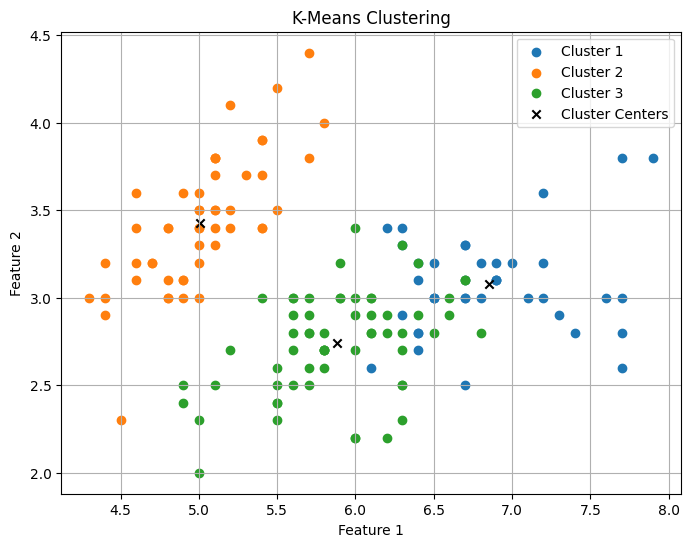

In [ ]:
# K-means clustering for EDA (optional)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))

for i in range(k):
    cluster_points = X[labels == i]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    marker='x',
    color='k',
    label='Cluster Centers'
)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

---
### **7. Activation and loss functions**

#### ReLU activation

Rectified Linear Unit (ReLU) is defined as:

$$
\mathrm{ReLU}(x) = \max(0, x)
$$

Derivative (used in backpropagation):

$$
\frac{d}{dx} \mathrm{ReLU}(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}
$$

#### Softmax activation

Used in the output layer for multiclass classification:

$$
\mathrm{softmax}(z_j) = \frac{e^{z_j}}{\sum_{l=1}^{k} e^{z_l}}
$$

#### Cross-Entropy loss

For true label vector $\mathbf{y}$ and predicted probabilities $\hat{\mathbf{y}}$:

$$
\mathcal{L}(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{j=1}^k y_j \log(\hat{y}_j)
$$

This loss is averaged over all samples.

In [ ]:
# Utility functions (activation, loss)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    # Subtract the max value of x to ensure numerical stability
    x -= np.max(x, axis=1, keepdims=True)
    e_x = np.exp(x)
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

---
## **6. Building a neural network from scratch**

We build a neural network with:
- One hidden layer (with ReLU activation)
- Output layer (with Softmax activation)
- Fully explicit forward and backward calculations

Network architecture:
- Input: $d$ features
- Hidden layer: $h$ units
- Output: $k$ units (classes)

### **Forward Pass**

Given input $\mathbf{X} \in \mathbb{R}^{n \times d}$:
- Hidden pre-activation: $\mathbf{Z}_1 = \mathbf{X}\mathbf{W}_1 + \mathbf{b}_1$
- Hidden activation: $\mathbf{A}_1 = \mathrm{ReLU}(\mathbf{Z}_1)$
- Output pre-activation: $\mathbf{Z}_2 = \mathbf{A}_1\mathbf{W}_2 + \mathbf{b}_2$
- Output activation: $\mathbf{A}_2 = \mathrm{softmax}(\mathbf{Z}_2)$

### **Backward Pass (Backpropagation)**

Gradients (for one batch):

- Output error:
$$
\delta_2 = \mathbf{A}_2 - \mathbf{Y}
$$
- Output weights/bias gradients:
$$
\frac{\partial L}{\partial \mathbf{W}_2} = \mathbf{A}_1^\top \delta_2
$$
$$
\frac{\partial L}{\partial \mathbf{b}_2} = \sum \delta_2
$$
- Hidden layer error:
$$
\delta_1 = (\delta_2 \mathbf{W}_2^\top) \odot \mathrm{ReLU}'(\mathbf{Z}_1)
$$
- Hidden weights/bias gradients:
$$
\frac{\partial L}{\partial \mathbf{W}_1} = \mathbf{X}^\top \delta_1
$$
$$
\frac{\partial L}{\partial \mathbf{b}_1} = \sum \delta_1
$$

### **Gradient Descent Update**
For each parameter $\theta$:
$$
\theta := \theta - \eta \frac{\partial L}{\partial \theta}
$$
where $\eta$ is the learning rate.

### **Initializing weights and biases**

- Hidden Layer (ReLU Activation): Use He initialization, which scales random values from a standard normal distribution (mean = 0, variance = 1), so the variance is approximately (2/hidden_units). This helps prevent vanishing or exploding gradients, which can occur with ReLU activations. Biases are initialized to 0 values.

- Output Layer (Softmax Activation): Use Xavier initialization, which scales random values from a standard normal distribution (mean = 0, variance = 1), so the variance is approximately (1/hidden_units). This is well-suited for sigmoid-like activations such as softmax. Biases are initialized to 0 values.

In [ ]:

# Neural network class from scratch

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights for the input to hidden layer (He initialization)
        self.w1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        # Initialize weights for the hidden to output layer (Xavier initialization)
        self.w2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        dz2 = y_pred - y_true
        dw2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        da1 = dz2 @ self.W2.T
        dz1 = da1 * relu_derivative(self.z1)
        dw1 = X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.w2 -= self.learning_rate * dw2
        self.b2 -= self.learning_rate * db2
        self.w1 -= self.learning_rate * dw1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=100, batch_size=16):
        history = {'loss': [], 'acc': []}
        n_samples = X.shape[0]
        for epoch in range(epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_pred)
            y_train_pred = self.forward(X)
            train_loss = cross_entropy(y_train_pred, y)
            train_acc = np.mean(np.argmax(y_train_pred, axis=1) == np.argmax(y, axis=1))
            history['loss'].append(train_loss)
            history['acc'].append(train_acc)
            print(f"Epoch {epoch + 1}/{epochs} | Loss: {train_loss:.4f} | Acc: {train_acc:.4f}")
        return history
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Returns the predicted probability distribution over classes for each sample.
        """
        return self.forward(X)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Returns the predicted class label (integer) for each sample.
        """
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

---
## **9. Training setup and hyperparameters**

Specify the network hyperparameters:
- Number of input features ($d = 4$)
- Number of hidden layer units ($h$, to be tuned)
- Number of output classes ($k = 3$)
- Learning rate ($\eta$)
- Number of training epochs
- Batch size


In [ ]:
# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 6
output_size = y_train.shape[1]
learning_rate = 1e-3
epochs = 10
batch_size = 16

---
## **10. Instantiate the neural network**

Create neural network model with the parameters defined above.s

In [ ]:
# Instantiate model
nn = SimpleNeuralNetwork(
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    learning_rate=learning_rate
)

---
## **11. Train the neural network**

The model is trained using **mini-batch gradient descent**.  
At each epoch, the following steps occur:
1. Shuffle the training data
2. Split into batches and perform forward/backward passes
3. Update weights and biases using gradients
4. Compute training loss/accuracy and monitor

In [ ]:
# Train model
history = nn.train(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size
)

---
## **12. Visualizing training loss/accuracy**

The loss and accuracy curves show how the model learns over time.  
- Loss should decrease
- Accuracy should increase

In [ ]:
# Plot training loss and accuracy curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['acc'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---
## **13. Evaluating the model on test data**

To measure the final model performance, compute:
- Test set **cross-entropy loss**
- Test set **classification accuracy**

Accuracy is defined as:
$$
\mathrm{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
$$

In [ ]:
# Evaluate on test data
y_test_pred = nn.forward(X_test)
test_loss = cross_entropy(y_test_pred, y_test)
test_acc = np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(y_test, axis=1))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

---
## **14. Confusion Matrix**

A **confusion matrix** shows where the model gets confused between classes.

For multiclass classification, the entry at $(i, j)$ is the number of samples from true class $i$ predicted as class $j$.

In [ ]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = nn.predict(X_test)

cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

---
## **15. Experiment: How does hidden layer size affect performance?**

We now sweep the **hidden layer size** and observe its effect on validation accuracy.

Try different values of $h$ and plot:
- Hidden size vs. validation accuracy

This gives insight into the network’s **capacity** and risk of **under/overfitting**.

In [ ]:
# Experiment: Tune hidden layer size
hidden_sizes = [2, 4, 6, 8, 12]
test_accuracies = []

for h in hidden_sizes:
    nn = SimpleNeuralNetwork(
        input_size=input_size,
        hidden_size=h,
        output_size=output_size,
        learning_rate=learning_rate
    )
    _ = nn.train(X_train, y_train, epochs=epochs, batch_size=batch_size)
    y_pred = nn.forward(X_test)
    acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    test_accuracies.append(acc)

---
## **16. Results: hidden layer size vs. validation accuracy**

We visualize how model capacity affects performance.  
- Too small a hidden layer: **underfits**
- Too large: risk of **overfitting**


In [ ]:
# Plot validation accuracy vs. hidden layer size
plt.figure(figsize=(8, 4))
plt.plot(hidden_sizes, test_accuracies, marker='o')
plt.title("Validation Accuracy vs. Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation Accuracy")

plt.show()

---
## **17. Experiment: Effect of temperature on the Softmax function**

In this section, I explore how temperature scaling affects the behavior of the Softmax function in the neural network's output layer.

### What Is temperature in Softmax?

The standard softmax function is defined as:
$$
\mathrm{softmax}(z_j) = \frac{\exp(z_j)}{\sum_{l=1}^k \exp(z_l)}
$$
where $\mathbf{z}$ is the vector of logits (raw output values) for each class, and $k$ is the number of classes.

**Temperature scaling** introduces a parameter $T > 0$ to control the "peakiness" of the softmax output:
$$
\mathrm{softmax}_T(z_j) = \frac{\exp(z_j / T)}{\sum_{l=1}^k \exp(z_l / T)}
$$

- When $T = 1$, this reduces to the standard softmax.
- When $T < 1$, the output distribution becomes more "peaked" (more confident predictions).
- When $T > 1$, the distribution becomes more "uniform" (less confident, more exploratory).

### Why Adjust Temperature?

- **Calibrating model confidence:** In some applications (e.g., reinforcement learning, sampling, uncertainty estimation), adjusting $T$ can help control how "confident" or "uncertain" the network's predictions are.
- **Exploration vs. exploitation:** High temperature encourages exploration; low temperature enforces exploitation (choosing the most probable class more deterministically).

### In this experiment

I vary the temperature parameter $T$ and observe how it changes the output probabilities of the neural network and the predicted class distributions on the Iris test set.

In [ ]:
def softmax(x, tau):
    # Subtract the max value of x to ensure numerical stability
    x -= np.max(x, axis=1, keepdims=True)
    e_x = np.exp(x / tau)
    return e_x / np.sum(e_x, axis=1, keepdims=True)


ZZ = np.array([[19, 20, 18]]).reshape(1, -1)

# Standard softmax
A_std = softmax(ZZ, 1)[0]

# High Temperature softmax
A_high = softmax(ZZ, 5)[0]

# Low temperature softmax
A_low = softmax(ZZ, 0.2)[0]

# Plot the results
plt.figure(dpi=120)
plt.plot(A_std, label='Temperature $T=1$ (Standard Softmax)')
plt.plot(A_high, label='High Temperature ($T>1$)')
plt.plot(A_low, label='Low Temperature ($T<1$)')
plt.title('Effect of Softmax Temperature on Output Probabilities')
plt.xlabel('Class Index or Sample Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()

---

# **DO NOT CONSIDER ANY OF THE CELLS BEYOND THIS POINT**

In [ ]:


def back_propagation(X, y_true, a1, a2, learning_rate):
    # Back propagation algorithm to compute the gradients and update weights and biases

    global w1, b1, w2, b2

    # Previous code attempt - how is this different from below?
    #da2 = -np.divide(y_true, a2)
    #dz2 = da2 * (a2 * (1 - a2))

    # Compute gradients
    dz2 = a2 - y_true
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    da1 = np.dot(dz2, w2.T)
    dz1 = da1 * relu_derivative(a1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return




def generate_batches(X, y, batch_size):
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)  # Shuffle indices to randomize the data
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]


def calculate_accuracy(y_true, y_pred):
    max_indices = np.argmax(y_pred, axis=1)
    y_pred_encoded = np.zeros(y_pred.shape, dtype=int)
    rows = np.arange(y_pred.shape[0])
    y_pred_encoded[rows, max_indices] = 1
    accuracy = np.mean(np.all(y_pred_encoded == y_true, axis=1)) * 100
    return accuracy


In [ ]:


    # ------------------------------------------------------------------
    # CHECK THESE CALCULATIONS
    # ------------------------------------------------------------------
    

    def _forward(
        self, X:
        np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
        z1 = np.dot(X, self.w1) + self.b1  # (n, hidden)
        a1 = _relu(z1)
        z2 = np.dot(a1, self.w2) + self.b2  # (n, output)
        a2 = _softmax(z2)
        return a1, a2, z1

    def _backward(
        self,
        X: np.ndarray,
        y: np.ndarray,
        a1: np.ndarray,
        a2: np.ndarray,
        z1: np.ndarray
    ) -> None:
        n = X.shape[0]
        dz2 = (a2 - y) / n        # (n, output)
        dw2 = np.dot(a1.T, dz2)   # (hidden, output)
        db2 = np.sum(dz2, axis=0)

        da1 = np.dot(dz2, self.w2.T)        # (n, hidden)
        dz1 = da1 * _relu_derivative(z1)    # (n, hidden)
        dw1 = np.dot(X.T, dz1)              # (input, hidden)
        db1 = np.sum(dz1, axis=0)

        # Previous code attempt - how is this different from above?
        #da2 = -np.divide(y_true, a2)
        #dz2 = da2 * (a2 * (1 - a2))

        # what is this calculation - different from above
        #dz2 = a2 - y_true


NEXT STEPS

Comment code and add all the maths calcs
Implement Stochastic Gradient Descent (??)
Implement early stopping
Make the training cycle a function so my main is minimal and can be repeated for different scenarios (maybe parameterize and then can easily compare scenario results.
How to 'see' this data as a cluster map? Hypothesis that it is easy to classify - run a logistic regression on it.
Implement K-folds - and other methods to make the best of a small dataset.
Synthetic data?
Implement temperature on the softmax and play with this.
Create alternative BP calcs with a2 and z2 rather than just z2 - review the maths.
Review detailed YT vids and implement NN as a class.
Comment on the sensitivity of the model to hyperparameters.
Implement dropout to randomly turn to zero a fraction of nodes - is this to prevent overfitting?

If you have a small dataset, consider augmenting your training data with transformations such as rotation, translation, or flipping. Data augmentation can provide the model with more diverse examples to learn from and prevent overfitting.

---

If your neural network is converging too quickly and then getting stuck at a suboptimal solution, you can try several techniques to slow down the convergence and potentially reach a better solution:

Reduce Learning Rate: Decrease the learning rate to slow down the updates to the model parameters. A smaller learning rate allows the model to explore the parameter space more gradually, potentially avoiding getting stuck in local minima.

Learning Rate Scheduling: Instead of using a fixed learning rate throughout training, consider using learning rate scheduling techniques such as exponential decay or step decay to gradually reduce the learning rate over epochs. This can help the model to converge more gradually.

Early Stopping: Monitor the validation performance of the model during training and stop training when the validation performance stops improving. Early stopping prevents overfitting and allows the model to find a better solution.

Batch Normalization: Use batch normalization layers in your neural network. Batch normalization can stabilize training by normalizing the activations of each layer and reducing the internal covariate shift, which can lead to faster convergence and better performance.

Regularization: Apply regularization techniques such as L1 or L2 regularization, dropout, or weight decay to prevent overfitting and improve generalization. Regularization can help the model to learn more slowly and generalize better to unseen data.

Increase Model Complexity: If your model is too simple, it may struggle to learn complex patterns in the data. Consider increasing the capacity of your model by adding more layers or units to better capture the underlying structure of the data.

Data Augmentation: If you have a small dataset, consider augmenting your training data with transformations such as rotation, translation, or flipping. Data augmentation can provide the model with more diverse examples to learn from and prevent overfitting.

---

Fluctuations in validation accuracy between epochs can occur due to several reasons:

Small Validation Set: If your validation set is small, it may not be representative of the overall distribution of the data. As a result, the validation accuracy can fluctuate between epochs due to random variations in the samples selected for validation.

High Learning Rate: A high learning rate can cause the model to oscillate around the optimal solution, leading to fluctuations in validation accuracy. Consider reducing the learning rate to stabilize training.

Model Instability: If the model architecture is unstable or if the training process is not properly regularized, the model may exhibit oscillations in performance between epochs. Regularization techniques such as dropout, weight decay, or batch normalization can help stabilize training.

Early Stopping: If you're using early stopping based on validation performance, fluctuations in validation accuracy can occur as the training is stopped when the validation performance does not improve for a certain number of epochs. This can result in variations in the final validation accuracy depending on when the training is stopped.

Data Variability: If the validation set contains highly variable or noisy samples, the model may perform differently on different subsets of the validation data, leading to fluctuations in validation accuracy.

Model Complexity: If the model is too complex relative to the size of the training data or if the model capacity is not well matched to the complexity of the task, the model may overfit the training data, leading to fluctuations in validation accuracy.

To address fluctuations in validation accuracy, you can try the following:

Increase the size of the validation set to improve its representativeness.
Experiment with different learning rates and regularization techniques to stabilize training.
Use techniques such as early stopping or model averaging to prevent overfitting and improve generalization performance.
Ensure that the model architecture and complexity are appropriate for the task and dataset.




Stuff re FastAPI

curl -X POST http://127.0.0.1:8000/which_species_is_this \
     -H "Content-Type: application/json" \
     -d '{"sepal_len": 5.1, "sepal_wid": 3.5, "petal_len": 1.4, "petal_wid": 0.2}'
Change 127.0.0.1 to your own ip



---

# **5. Resources**

RMSProp and ADAM
https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be

https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

Building makemore Part 4: Becoming a Backprop Ninja
https://www.youtube.com/watch?v=q8SA3rM6ckI&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=6&t=939s


Matrix multiplication animation
https://www.youtube.com/watch?v=1hf_cHNbgCk


The Matrix Calculus You Need For Deep Learning
https://explained.ai/matrix-calculus/#sec:1.2



Softmax derivative
https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/
https://www.mldawn.com/the-derivative-of-softmaxz-function-w-r-t-z/

```
# utility function we will use later when comparing manual gradients to PyTorch gradients
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')
```

Deploy ML models with FastAPI, Docker, and Heroku | Tutorial
https://www.youtube.com/watch?v=h5wLuVDr0oc

Dockerize FastAPI project like a pro - Step-by-step Tutorial
https://www.youtube.com/watch?si=ll6mFzr_MblIIsGE&v=CzAyaSolZjY&feature=youtu.be

5 Examples of Nonlinear Relationships Between Variables
https://www.statology.org/nonlinear-relationship-examples/

Setting your username in Git
https://docs.github.com/en/get-started/getting-started-with-git/setting-your-username-in-git

Getting Git right
https://www.atlassian.com/git

Why You NEED To Learn FastAPI | Hands On Project
https://www.youtube.com/watch?v=cbASjoZZGIw

Weight Initialization explained | A way to reduce the vanishing gradient problem  
https://www.youtube.com/watch?v=8krd5qKVw-Q


